In [35]:
# Import Libraries
import pandas as pd

In [41]:
# Load the housing data into DataFrame
df = pd.read_csv('./data/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [42]:
# Descriptive Statistics
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [44]:
# Descriptive Statics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [45]:
# Shape of the DataFrame
df.shape

(5000, 7)

In [46]:
# Check missing values
m_values = df.isnull().sum()
m_values

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

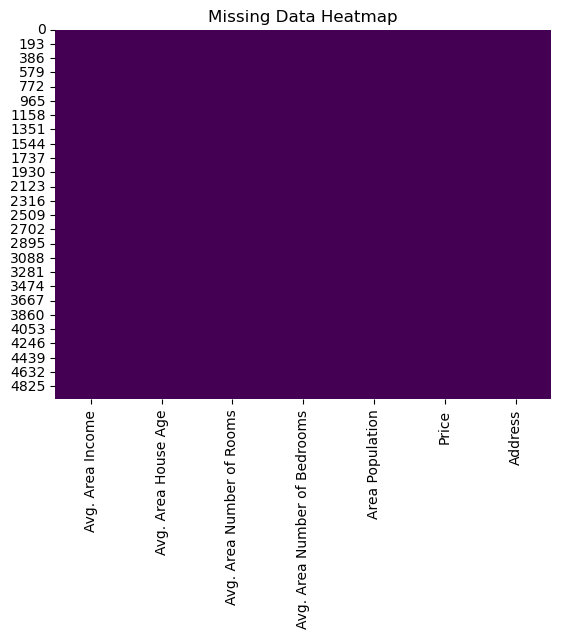

In [50]:
# Visualize the Missing Data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

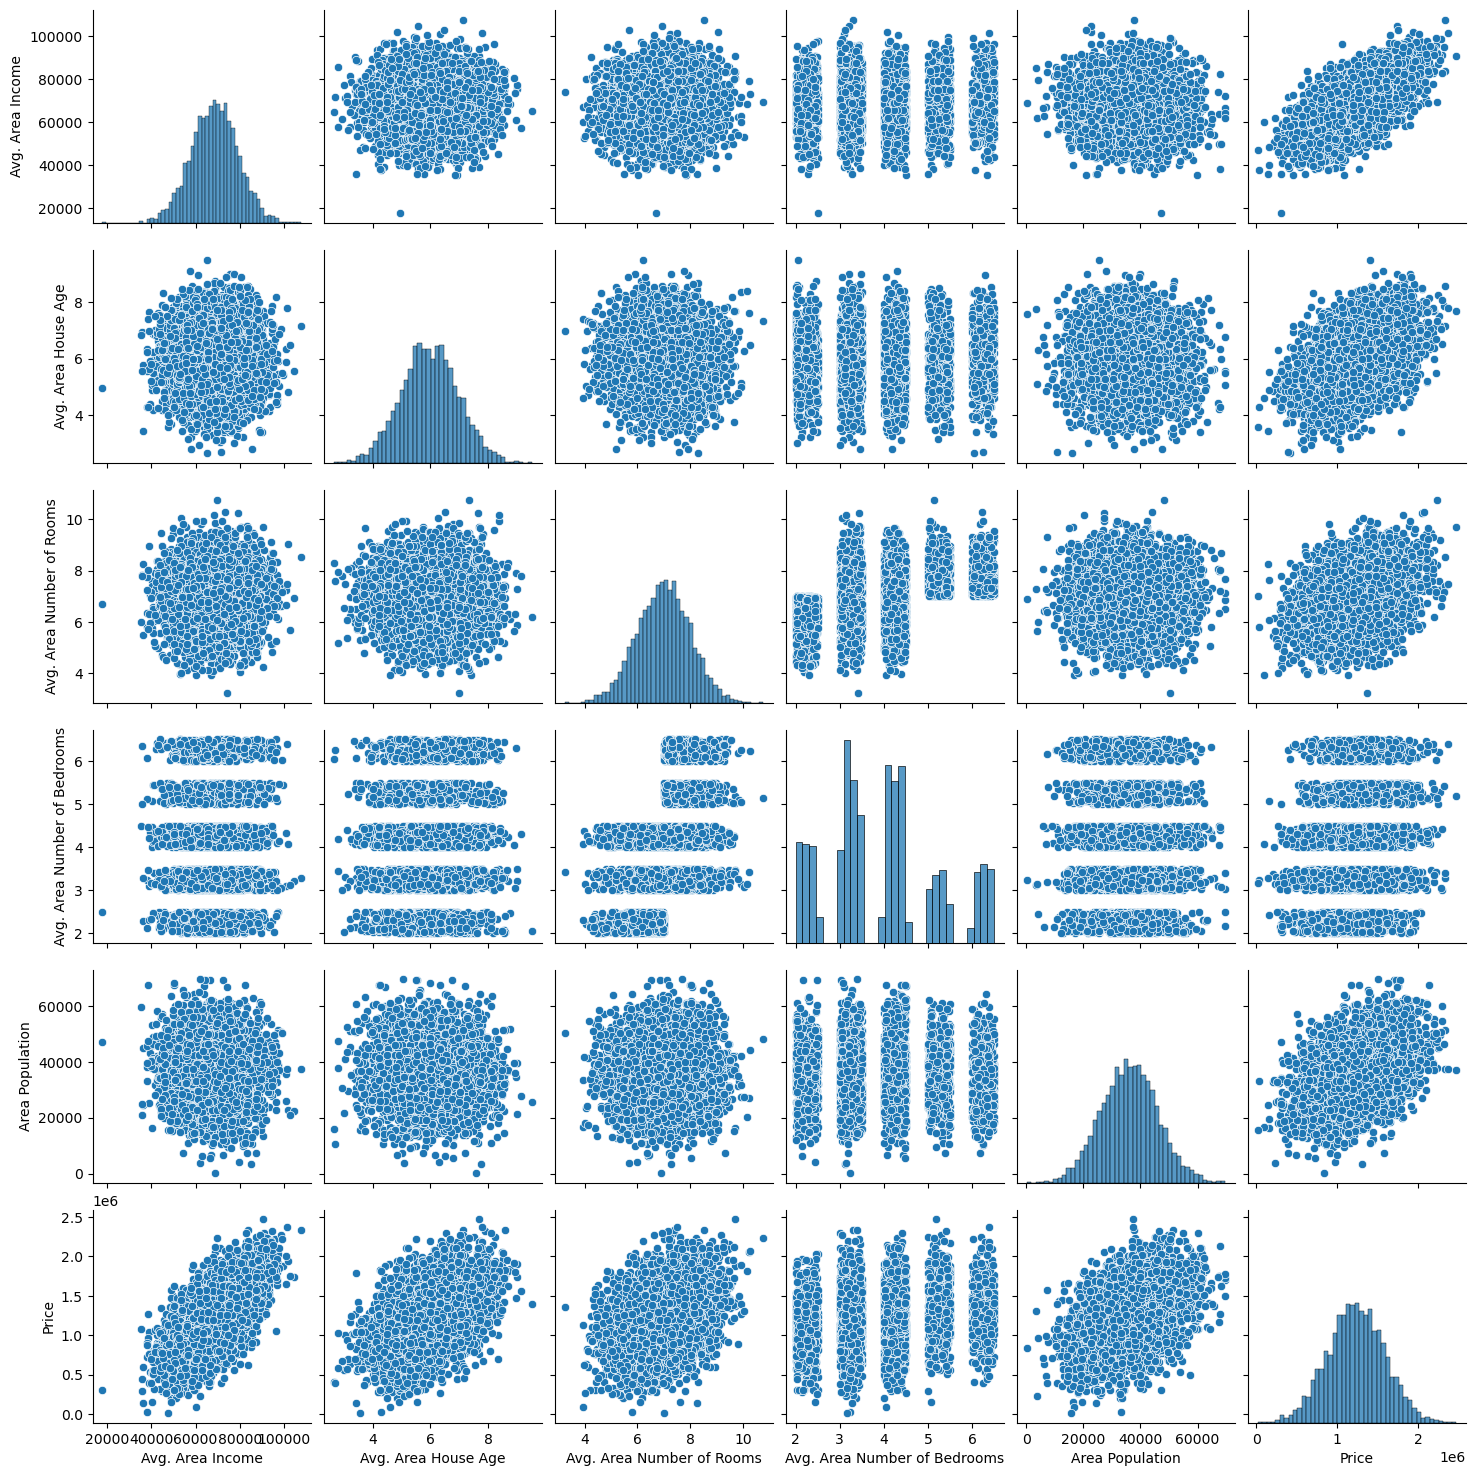

In [51]:
# Visualize relationship between features with pair plot
sns.pairplot(df)
plt.show()


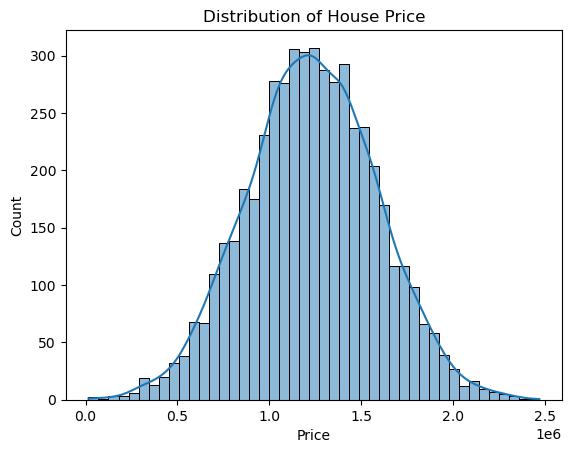

In [19]:
# Plot distribution of the target variable
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Price')
plt.show()

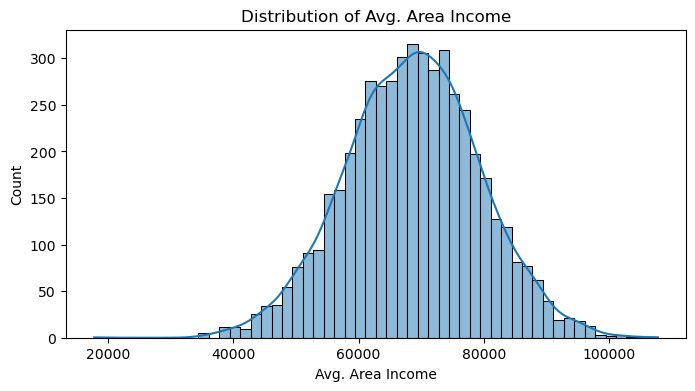

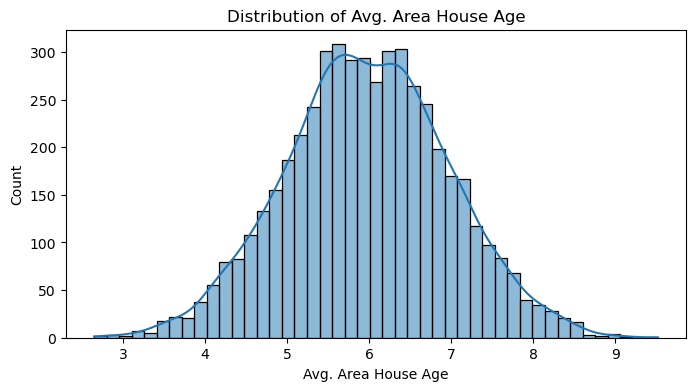

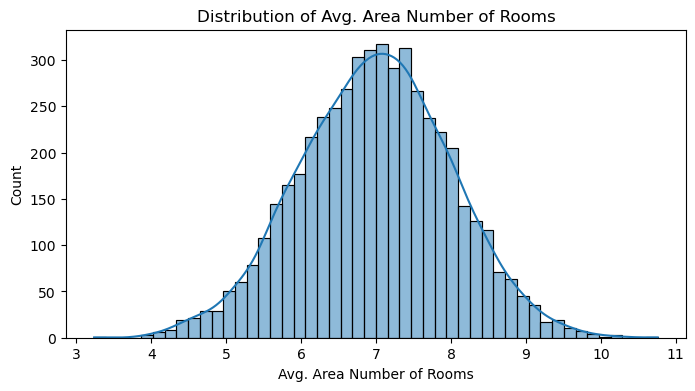

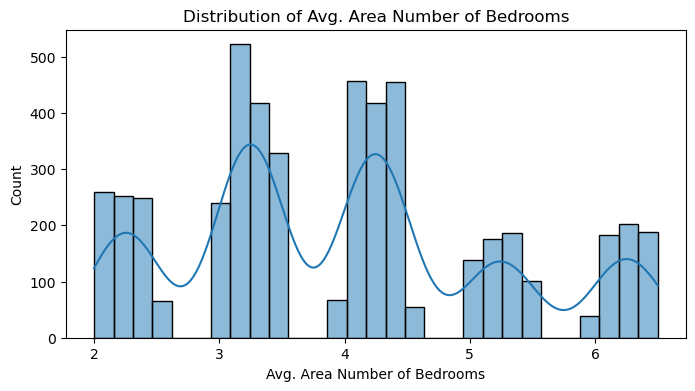

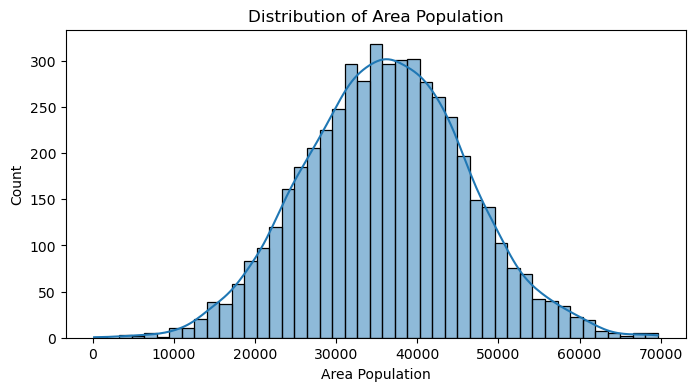

In [57]:
# Visualize the distribution of individual features
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and col != 'Price':
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

In [55]:
# Feature Selection
df = df.drop(['Address'], axis=1)

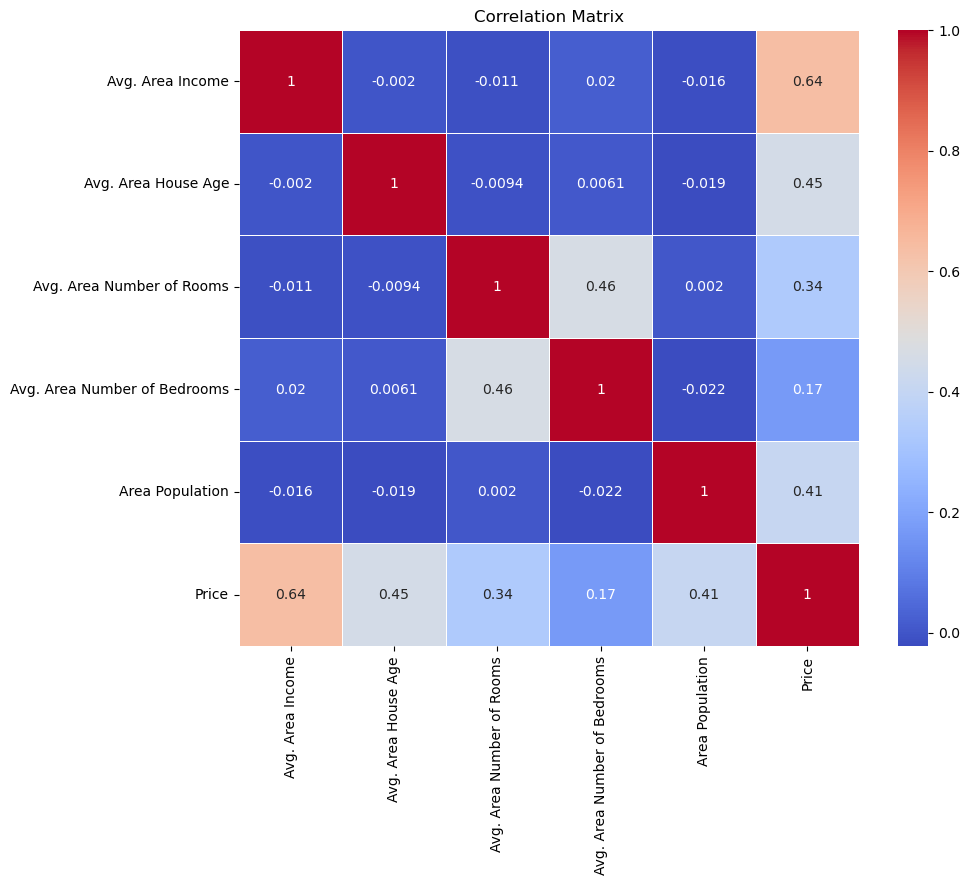

In [56]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10,8))
cmx = df.corr()
sns.heatmap(cmx, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [58]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [62]:
# Feature Selection
X = df.drop(['Price'], axis=1)
# Select Tartet variable
y = df['Price']

In [100]:
# Sacle the feature variablres to standardize them
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2, random_state=123)

In [103]:
from sklearn.linear_model import  LinearRegression
lr = LinearRegression()

In [104]:
lr.fit(X_train, y_train)

LinearRegression()

In [105]:
print(lr.intercept_)

1231807.5085475463


In [106]:
lr.coef_

array([ 2.30428960e+05,  1.64152981e+05,  1.19994773e+05,  2.57953664e+03,
        1.50998987e+05,  5.81899619e+02,  1.59677176e+03, -2.59590832e+03,
        1.63638070e+03,  8.74215293e+02,  9.40886731e+02,  1.15054119e+03,
       -2.86378188e+03, -6.25300692e+02,  9.34814462e+02, -6.50712233e+01,
        1.18664605e+03, -9.75770815e+02, -1.41125686e+02, -4.74520253e+02])

In [108]:
cdf = pd.DataFrame(lr.coef_, poly.get_feature_names_out(input_features=X.columns, columns=['Coefficient'])

SyntaxError: incomplete input (4080839684.py, line 1)

In [93]:
cdf

,Coefficient
Avg. Area Income,230398.680124
Avg. Area House Age,164184.958983
Avg. Area Number of Rooms,120044.971828
Avg. Area Number of Bedrooms,2115.096275
Area Population,151040.224850


In [109]:
# Predict 
y_pred = lr.predict(X_test)

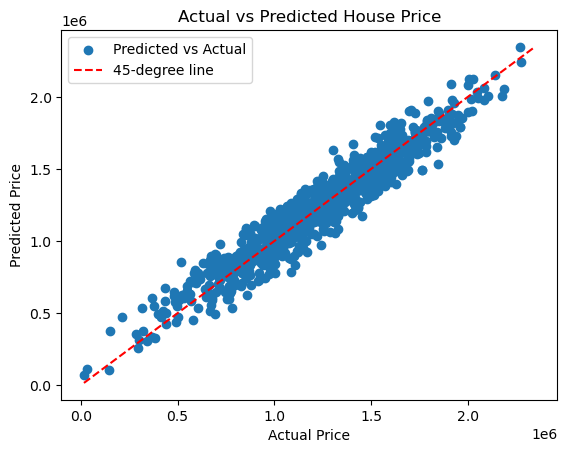

In [110]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, label='Predicted vs Actual')

# Adding 45-degree slope line
min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='45-degree line')

# Label the axes and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Price')
plt.legend() # Add a Legend
plt.show() # Disply the plot

In [111]:
# Eevalution of model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate with MAE
mean_absolute_error(y_test, y_pred)

82772.55342392293

In [112]:
# Evaluate model with MSE
mean_squared_error(y_test, y_pred)

10806954842.458591

In [113]:
# Evaluate Model with R-Squared
r2_score(y_test, y_pred)

0.9187015127607735